In [1]:
import pandas as pd
from kiwipiepy import Kiwi
from kss import split_sentences
from collections import Counter
import pprint as pp
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [13]:
f = open("C:/Users/ghdtk/OneDrive/Desktop/VSCode/Python/KoreanNewsChronicle/Data/2019/2019 북미정상회담.txt", "r", encoding = 'utf-8')
content = f.read()

In [72]:
kiwi = Kiwi()
kiwi.load_user_dictionary('../PreProcess/new_wordlist.txt')
kiwi.prepare()

stopword = []
def rm_stopword(stopword_file): 
    files = open(stopword_file, 'r', encoding="utf-8-sig")
    while True: #불용어 리스트 생성
        line = files.readline()
        if not line: break
        wordlist = line.split('\t')
        if wordlist[1].startswith('N'):
            stopword.append(wordlist[0])
    stopwords = set(stopword)
    files.close()


In [74]:
rm_stopword('../PreProcess/한국어불용어100.txt')

In [15]:
rm_stopword('../PreProcess/한국어불용어100.txt')
docs = []
merge_token = []
bi_gram = {}
LDA_Topics = []
i = 0
for news in open('C:/Users/ghdtk/OneDrive/Desktop/VSCode/Python/KoreanNewsChronicle/Data/2019/2019 북미정상회담.txt', encoding='utf-8'):
    doc = []
    context = []
    com = []
    lines = split_sentences(news)

    #형태소 분석
    for res in kiwi.analyze(lines):
        content = [word.strip() for word, tag, _, _ in res[0][0] if tag.startswith('N') and word not in stopword] #불용어사전 적용
#         context += content
        doc.append(content)
    docs.append(doc)

In [16]:
corpus = []
for Nouns in doc:
    Nouns = str(Nouns)
    Nouns = Nouns.replace("[", "").replace("]", "").replace("'", "")
    corpus.append(" ".join(Nouns.split(', ')))
c = " ".join(corpus)
corpus2 = []
corpus2.append(c)
corpus = corpus2

In [17]:
vectorizer = CountVectorizer()
sp_matrix = vectorizer.fit_transform(corpus)

word2id = defaultdict(lambda : 0)
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

mylist = []
for i, sent in enumerate(corpus):
#     print('====== document[%d] ======' % i)
    mylist.append([(token, sp_matrix[i, word2id[token]]) for token in sent.split()])
#     print( [ (token, sp_matrix[i, word2id[token]]) for token in sent.split() ] )
    if i % 10000 == 0:
        print(i)

0


In [18]:
docs = []
for m in mylist:
    words = []
    values = []
    for noun in m:
        words.append(noun[0])
        values.append(noun[1])
    doc = pd.DataFrame({"word":words, "value":values})
    doc = doc.drop_duplicates(['word'])
    doc = doc.sort_values(by = 'value', ascending = False)
    docs.append(doc)

In [19]:
topics = []
for doc in docs:
    df2 = pd.DataFrame(doc)
    topic = []
    for i in range(len(df2)):
        topic.append(df2.iloc[i]['word'])
        if(i == 9):
            break
    topics.append(', '.join(topic))

In [52]:
#oasis_topic = topics
oasis_topic = ["회담, 위원장, 영변, 조건, 결렬, 하노이, 김정은, 대통령, 정상, 미국",
              "진화, 산불, 피해, 인근, 출동, 오후, 강원도, 토성면, 원암리, 강풍",
              "구조, 수색, 헝가리인, 크루즈, 바이킹, 승무원, 헝가리, 정부, 외교부, 강경화",
              "회담, 대통령, 트럼프, 정상, 중요, 실무, 도널드, 미국, 김정은, 합의"]

In [77]:
from kss import split_sentences

lines='2019년 2월 27일부터 28일까지 베트남 하노이에서 도널드 트럼프 미국 대통령과 김정은 북한 국무위원회 위원장 간의 정상회담이 개최되었다. 제1차 정상회담 이후로 260일 만에 열린 회담이다. 도널드 트럼프 대통령과 김정은 위원장은 하노이 소피텔 레전드 메트로폴 호텔에서 만났다. 그러나 회담 2일째의 업무 오찬이 돌연 취소됐고, 곧이어 뜻밖에도 회담 결렬이 선언되었다. 최종합의에서 북한은 영변 비핵화를 조건으로 한 대북제재 완전 해제를 제안하였으나, 미국은 영변 외 지역의 다른 핵시설까지도 완전히 비핵화할 것을 조건으로 제시하였다. 선언문은 준비되어 있었으나, 두 의견이 상충하면서 채택이 결렬되었다.'
lines_split=split_sentences(lines)

for res in kiwi.analyze(lines_split):
    #content = [word.strip() for word, tag, _, _ in res[0][0] if tag.startswith('N') and word not in stopword] #불용어사전 적용
    content=[word.strip() for word, tag, _, _ in res[0][0] if tag.startswith('N') and word not in stopword]
    print(content)

['베트남', '하노이', '도널드 트럼프 미국', '대통령', '김정은 북한 국무', '위원회', '위원장', '간', '정상회담', '개최']
['제1차 정상회담', '이후', '회담']
['도널드', '트럼프 대통령', '김정은', '위원장', '하노이', '소피', '텔', '레전드', '메트로', '폴', '호텔']
['회담 2일째', '업무', '오찬', '취소', '회담 결렬', '선언']
['최종', '합의', '북한', '영변', '핵', '조건', '한 대북제재', '완전', '해제', '제안', '미국', '영변', '외', '지역', '핵', '시설', '핵', '조건', '제시']
['선언문', '준비', '의견', '상충', '채택', '결렬']


In [3]:
import pandas as pd

csv = pd.read_csv("../Data/2019 북미정상회담-데이터10.csv")

In [4]:
text=csv['text']
print(text)

with open('News_Contents.txt','w',encoding='utf-8-sig') as file:
    for item in text:
        file.write("%s\n" % item.replace("\n"," "))


0    김정은 국무위원장은 2019년 신년사에서 “미국 대통령과 마주 앉을 준비가 되어 있...
1    27~28일 베트남 하노이에서 열리는 2차 북미정상회담을 앞두고 한국의 역할과 노력...
2    문재인 대통령은 2월 28일 18시50분부터 25분 동안 도널드 트럼프 미국 대통령...
3    한미연합훈련인 키리졸브(KR:Key Resolve) 연습과 독수리훈련(FE:Foal...
4    키리졸브연습은 한미 연합군사령부가 연합사 '작전계획 5027' 등을 적용해 컴퓨터 ...
5    일본의 주요 언론 매체들은 28일 베트남 하노이에서 열린 2차 북미 정상회담이 '하...
6    제2차 북미 정상회담이 합의에 이르지 못하고 결렬됐지만, 북한은 1일 이를 전혀 언...
7    도널드 트럼프 미국 대통령이 연두교서에서 제2차 북미 정상회담 날짜를 확정하면서 전...
8    김정은 북한 국무위원장이 베트남 하노이에서 열리는 2차 북미 정상회담에 참석하기 위...
9    김정은 북한 국무위원장에게 이번 2차 북미 정상회담은 그 결과에 따라 북한이 목표로...
Name: text, dtype: object


In [11]:
docs = []
merge_token = []
bi_gram = {}
LDA_Topics = []
i = 0
for news in open('News_Contents.txt', encoding='utf-8-sig'):
    doc = []
    context = []
    com = []
    lines = split_sentences(news)

    #형태소 분석
    for res in kiwi.analyze(lines):
        content = [word.strip() for word, tag, _, _ in res[0][0] if tag.startswith('N') and word not in stopword] #불용어사전 적용
#         context += content
        doc.append(content)
    docs.append(doc)

In [12]:
corpus = []
for doc in docs:
    s = ""
    for Nouns in doc:
        Nouns = str(Nouns)
        Nouns = Nouns.replace("[", "").replace("]", "").replace("'", "")
        s = s + " ".join(Nouns.split(', '))
    corpus.append(s)

In [13]:
corpus

['김정은 국무 위원장 년 신년사 미국 대통령 준비 국제 사회 환영 결과 노력 것뒤 김영철 당 부위원장 워싱턴 방문 트럼프 대통령 김 위원장 친서 전달차 북미 정상회담 월 일 베트남 하노이 발표이 미국 북한 정상 년 월 일 싱가포르 역사 만남 지 일 만 일김영철 당 부위원장 백악관 트럼프 대통령 한반도 평화 체제 구축 이후 주한 미군 철수 요구 김정은 위원장 입장 공식 전달이 년 월 김용순 당 국제 부장 아널드 캔 터 미 국무부 차관 통일 뒤 지역 세력 균형 안보 주한미군 주둔 필요 입장 전달한 이래 북한 측 미국 전달한 번 발언대 북 제재 완화 협상 카드 북미 간 협의 내용 폼페이오 국무 장관 비건 대표 발언 수비건 대표 월 일 스탠퍼드 대학 연설 전쟁 북한 침공 것 북한 정권 붕괴 시도 것 점 히월 일 문희상 국회 의장 자리 북한 개 이상 문제 논의 싱가포르 공동 성명 이행 협력 것 말폼페이오 국무 장관 월 일 미 CBS 인터뷰 대 북 제재 완화 대가 결과 것 목표 대 북 제재 완화 처음 협상 카드 제시월 일 미 폭스뉴스 인터뷰 한국 전쟁 공식 종식 얘기 핵 한반도 안보 메커니즘 평화 메커니즘 창설 얘기이번 차 북미 정상회담 1차 회담 때 진전 핵 합의문 도출 것 기대미국 협상 초기 일괄 타결 일괄 조치 접근법 부분 단계 접근 수용 선 핵 후 상응조치 입장 견지반면 북한 단계 동시 행동 조치 접근법 일관 주장월 일 비건 대북 정책 특별대표 스탠퍼드 대학 연설 동시 병행 원칙 제시 측 접근법싱가포르 개 항 바탕 개 항 협의 월 일 평양 방문 비건 특별대표 김혁철 대표 협의 차 북미 정상회담 한 주 본격 협상 합의문 조율 것비건 대표 싱가포르 공동 성명 개 항 기초 개 항목 협의 한 것 때 이번 하노이 공동 성명 핵 상응조치 항목 포괄 합의 대한 기대감 수논의 수준 때 이번 회담 한반도 비핵화 상응조치 과정 이행 계획 포함한 일괄 타결 빅딜 것핵 위협 본질 과거 핵 미래 핵 핵 포함 합의 스몰 디 국내외 반발 가능빅딜 실패한 회담 절반 성공 회담 평가 것 스몰

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

vectorizer = CountVectorizer()
sp_matrix = vectorizer.fit_transform(corpus)

word2id = defaultdict(lambda : 0)
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

mylist = []
for i, sent in enumerate(corpus):
#     print('====== document[%d] ======' % i)
    mylist.append([(token, sp_matrix[i, word2id[token]]) for token in sent.split()])
#     print( [ (token, sp_matrix[i, word2id[token]]) for token in sent.split() ] )
    if i % 10000 == 0:
        print(i)

0


In [15]:
docs = []
for m in mylist:
    words = []
    values = []
    for noun in m:
        words.append(noun[0])
        values.append(noun[1])
    doc = pd.DataFrame({"word":words, "value":values})
    doc = doc.drop_duplicates(['word'])
    doc = doc.sort_values(by = 'value', ascending = False)
    docs.append(doc)

In [16]:
topics = []
for doc in docs:
    df2 = pd.DataFrame(doc)
    topic = []
    for i in range(len(df2)):
        topic.append(df2.iloc[i]['word'])
        if(i == 9):
            break
    topics.append(', '.join(topic))

In [17]:
article_topics = topics

In [18]:
article_topics

['북한, 정상회담, 회담, 한반도, 비핵화, 북미, 합의, 미국, 협의, 포괄',
 '정상회담, 북미, 미국, 합의, 한국, 목표, 관련, 북한, 관계, 성공',
 '대통령, 트럼프, 협의, 회담, 결과, 심도, 위원장, 한편, 향후, 평가',
 '훈련, 국방부, 장관, 결정, 통화, 이름, 연합, 한미, 미국, 양국',
 '훈련, 연합, 연습, 한미, 작전, 중단, 명칭, 사령부, 규모, 시행',
 '트럼프, 대통령, 기자회견, 회담, 뉴스, 합의, 내용, 속보, 북미, 하노이',
 '회담, 위원장, 대통령, 사진, 미국, 트럼프, 대화, 긍정, 국무, 북한',
 '위원장, 정상회담, 북한, 트럼프, 대통령, 북미, 합의, 조치, 대한, 핵무기',
 '위원장, 베트남, 시간, 오전, 열차, 전용, 정부, 국기, 부장, 한국',
 '경제, 위원장, 북미, 정상회담, 북한, 노선, 총력, 성장, 2차, 성과']

In [33]:
oasis_topic

['회담, 위원장, 영변, 조건, 결렬, 하노이, 김정은, 대통령, 정상, 미국',
 '진화, 산불, 피해, 인근, 출동, 오후, 강원도, 토성면, 원암리, 강풍',
 '구조, 수색, 헝가리인, 크루즈, 바이킹, 승무원, 헝가리, 정부, 외교부, 강경화',
 '회담, 대통령, 트럼프, 정상, 중요, 실무, 도널드, 미국, 김정은, 합의']

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
#코사인 유사도 threshold
cosine_similarity_threshold = [0.2, 0.4, 0.6, 0.8]

tfidf = CountVectorizer()

TP = [0, 0, 0, 0] # our's O oasis O
FP = [0, 0, 0, 0] # our's O oasis X
FN = [0, 0, 0, 0] # our's X oasis O

for topic in article_topics:
    topic_list = []
    topic_list.append(topic)
    topic_list.extend(oasis_topic)
    
    vec = tfidf.fit_transform(topic_list)
    
    similarity = cosine_similarity(vec[0], vec)[0][1:]
    for i in range(4):
        check = False
        for sim in similarity:
            if sim >= cosine_similarity_threshold[i]:
                check = True
                break
        if check:
            TP[i] += 1
        else:
            FP[i] += 1
    #print(similarity)

print('----------------')            
for topic in oasis_topic:
    topic_list = []
    topic_list.append(topic)
    topic_list.extend(article_topics)
    
    vec = tfidf.fit_transform(topic_list)
    
    similarity = cosine_similarity(vec[0], vec)[0][1:]
    print(similarity)
    for i in range(4):
        check = False
        for sim in similarity:
            if sim >= cosine_similarity_threshold[i]:
                check = True
                break
        if not check:
            FN[i] += 1
    

#print(TP, FP, FN)

----------------
[0.2 0.1 0.3 0.1 0.  0.3 0.4 0.2 0.1 0.1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.  0.  0.  0.  0.  0.  0.  0.  0.1 0. ]
[0.3 0.2 0.3 0.1 0.  0.4 0.4 0.3 0.  0. ]


In [41]:
print(similarity)

[0.2 0.1 0.3 0.1 0.  0.3 0.4 0.2 0.1 0.1]


In [54]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re

#코사인 유사도 threshold
#cosine_similarity_threshold = [0.2, 0.4, 0.6, 0.8]

tfidf = CountVectorizer()

# TP = [0, 0, 0, 0] # our's O oasis O
# FP = [0, 0, 0, 0] # our's O oasis X
# FN = [0, 0, 0, 0] # our's X oasis O

TP=0
FP=0
FN=0

df1=pd.read_csv('../Data/2019/2019_kmeans_topics_231.csv','r',encoding='utf-8-sig')
df2=pd.read_csv('../Data/2019/2019_big_topics.csv','r',encoding='cp949')

article_topics=[]
for topic in df1['topics']:
    arr=re.sub("[\[,'\]]", '',topic).split(' ')
    arr=", ".join(arr)
    article_topics.append(arr)

# KMeans 상위 20개
tmp = []
tmp.append(article_topics[3])
tmp.append(article_topics[2])
tmp.append(article_topics[139])
tmp.append(article_topics[11])
tmp.append(article_topics[5])
tmp.append(article_topics[1])
tmp.append(article_topics[60])
tmp.append(article_topics[204])
tmp.append(article_topics[15])
tmp.append(article_topics[21])
tmp.append(article_topics[13])
tmp.append(article_topics[12])
tmp.append(article_topics[27])
tmp.append(article_topics[22])
tmp.append(article_topics[79])
tmp.append(article_topics[97])
tmp.append(article_topics[50])
tmp.append(article_topics[210])
tmp.append(article_topics[35])
tmp.append(article_topics[183])
article_topics = tmp

# #DBSCAN 상위 20개
# tmp = []
# tmp.append(article_topics[0])
# tmp.append(article_topics[6])
# tmp.append(article_topics[11])
# tmp.append(article_topics[18])
# tmp.append(article_topics[31])
# tmp.append(article_topics[45])
# tmp.append(article_topics[38])
# tmp.append(article_topics[15])
# tmp.append(article_topics[19])
# tmp.append(article_topics[32])
# tmp.append(article_topics[24])
# tmp.append(article_topics[12])
# tmp.append(article_topics[16])
# tmp.append(article_topics[8])
# tmp.append(article_topics[27])
# tmp.append(article_topics[49])
# tmp.append(article_topics[2])
# tmp.append(article_topics[7])
# tmp.append(article_topics[37])
# tmp.append(article_topics[44])
# article_topics = tmp

big_topics=[]
for topic in df2['topics']:
    arr=re.sub("[\[,'\]]", '',topic).split(' ')
    arr=", ".join(arr)
    big_topics.append(arr)

big_topics


['북한, 정상회담, 미국, 위원장, 대통령, 도널드트럼프, 회담, 북미, 김정은, 협상, 북미정상, 한반도, 대화, 하노이, 중국, 정상, 평화, 비핵화, 베트남, 남북',
 '산불, 대통령, 강원도, 피해, 국회, 지역, 재난, 정부, 발생, 대표, 한국당, 장관, 강원, 지원, 국민, 고성, 대응, 청와대, 상황, 화재',
 '대통령, 북한, 정상회담, 도널드트럼프, 위원장, 미국, 대화, 한반도, 평화, 회담, 남북, 김정은, 북미, 정상, 비핵화, 남북미, 협상, 북미정상, 한국, 하노이',
 '헝가리, 사고, 유람선, 침몰, 다뉴브강, 한국인, 부다페스트, 수색, 시신, 실종자, 인양, 구조, 현지, 확인, 현장, 정부, 한국, 작업, 수습, 선체']

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
sims = []
TP1=0
TP2=0
FP=0
FN=0

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity


for topic in article_topics:
    similarity=[]

    for btopic in big_topics:
        topic_list = []
        topic_list.append(topic)
        topic_list.append(btopic)

        tfidf_vect_simple = TfidfVectorizer(min_df=1)
        feature_vect_simple = tfidf_vect_simple.fit_transform(topic_list)

        feature_vect_dense = feature_vect_simple.todense()

        vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
        vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

        similarity_simple = cos_similarity(vect1, vect2)
        similarity.append(similarity_simple)
    #vec = tfidf.fit_transform(topic_list)
    
    #similarity = cosine_similarity(vec[0], vec)[0][1:]
    
    sims.append(similarity)
    print(similarity)
    check=False
    for sim in similarity:
        if sim >= 0.5:
            check=True
            break
    if not check:
        FP += 1
    else:
        TP1 += 1
    #print(similarity)

print('----------------')            
for topic in big_topics:

    similarity=[]
    for itopic in article_topics:
        topic_list = []
        topic_list.append(topic)
        topic_list.append(itopic)

        tfidf_vect_simple = TfidfVectorizer(min_df=1)
        feature_vect_simple = tfidf_vect_simple.fit_transform(topic_list)

        feature_vect_dense = feature_vect_simple.todense()

        vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
        vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

        similarity_simple = cos_similarity(vect1, vect2)
        similarity.append(similarity_simple)
        
    #vec = tfidf.fit_transform(topic_list)
    
    #similarity = cosine_similarity(vec[0], vec)[0][1:]
    print(similarity)
    check=False
    for sim in similarity:
        if sim >= 0.5:
            check=True
            break
    if not check:
        FN+= 1
    else:
        TP2+= 1
    

print(TP1, TP2, FP, FN)

precision=(TP1)/(TP1+FP)
recall=(TP2)/(TP2+FN)

if(precision + recall == 0):
    F_score = 0
else:    
    F_score=2*((precision*recall)/(precision+recall))

print("precision:{},recall:{},F_score:{}".format(precision,recall,F_score))

[0.031189308225656277, 0.06437099366532753, 0.06437099366532752, 0.06437099366532753]
[0.02910849362175736, 0.1643445567680419, 0.02910849362175736, 0.02910849362175736]
[0.02910849362175736, 0.16434455676804186, 0.02910849362175736, 0.02910849362175736]
[0.0, 0.0, 0.0, 0.028212976524438108]
[0.08958749235553914, 0.05802845068119371, 0.08958749235553914, 0.05802845068119372]
[0.1780271229867356, 0.06437099366532753, 0.22150013430590973, 0.06437099366532752]
[0.15339846575647692, 0.05629715757507137, 0.15339846575647692, 0.027395330814104696]
[0.05802845068119371, 0.19641032552622295, 0.05802845068119371, 0.028212976524438105]
[0.0, 0.09262135980593036, 0.02910849362175736, 0.02910849362175736]
[0.0, 0.02910849362175736, 0.0, 0.1273595297947936]
[0.09262135980593036, 0.02910849362175736, 0.09262135980593036, 0.05992996822422367]
[0.0, 0.054712118539283594, 0.0, 0.0]
[0.0, 0.08201057813079438, 0.02595291901635106, 0.0532538373370539]
[0.1643445567680419, 0.05992996822422367, 0.1643445567

In [70]:
from sklearn.metrics.pairwise import cosine_similarity
#코사인 유사도 threshold


tfidf = CountVectorizer()

TP = 0 # our's O oasis O
FP = 0 # our's O oasis X
FN = 0 # our's X oasis O

for topic in article_topics:
    topic_list = []
    topic_list.append(topic)
    topic_list.extend(big_topics)
    
    vec = tfidf.fit_transform(topic_list)
    
    similarity = cosine_similarity(vec[0], vec)[0][1:]

    check = False
    for sim in similarity:
        if sim >= 0.5:
            check = True
            break
    if check:
        TP += 1
    else:
        FP += 1
    #print(similarity)

print('----------------')            
for topic in big_topics:
    topic_list = []
    topic_list.append(topic)
    topic_list.extend(article_topics)
    
    vec = tfidf.fit_transform(topic_list)
    
    similarity = cosine_similarity(vec[0], vec)[0][1:]
    #print(similarity)

    check = False
    for sim in similarity:
        if sim >= 0.5:
            check = True
            break
    if not check:
        FN += 1
    

print(TP, FP, FN)

----------------
2 48 1


Text(0, 0.5, 'Similarity')

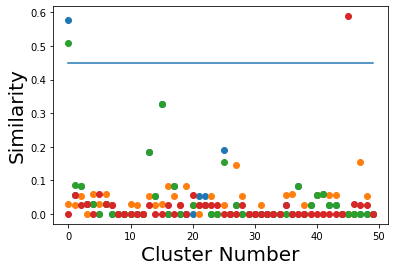

In [74]:
import matplotlib.pyplot as plt

cluster_num = range(0, len(sims), 1)
size = len(sims[0])
for i in range(size):
    similarity = []
    for sim in sims:
        similarity.append(sim[i])
    plt.scatter(x = cluster_num, y = similarity)
# plt.xticks(np.arange(0, 22, 2))
plt.plot([0.45] * 50)
plt.xlabel("Cluster Number", fontsize = 20)
plt.ylabel("Similarity", fontsize = 20)

In [69]:
len(sims2)

6

[[0.5769328761339175, 0.02910849362175736, 0.5101490193104814, 0.0],
 [0.05629715757507137,
  0.027395330814104696,
  0.08683346737229902,
  0.05629715757507137],
 [0.08201057813079436,
  0.0532538373370539,
  0.08201057813079436,
  0.02595291901635106],
 [0.028212976524438108, 0.0, 0.028212976524438108, 0.028212976524438108],
 [0.02910849362175736, 0.05992996822422367, 0.02910849362175736, 0.0],
 [0.0, 0.028212976524438105, 0.0, 0.05802845068119371],
 [0.028212976524438108,
  0.05802845068119371,
  0.028212976524438108,
  0.028212976524438105],
 [0.0, 0.026644887802214676, 0.0, 0.026644887802214676],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.028212976524438108, 0.0, 0.0],
 [0.0, 0.026644887802214676, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.18375568986292978,
  0.054712118539283594,
  0.18375568986292978,
  0.026644887802214676],
 [0.054712118539283594, 0.026644887802214676, 0.054712118539283594, 0.0],
 [0.32600302866471614, 0.028212976524438108, 0.32600302866471614, 0.0],
 

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import math
from collections import Counter
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/ghdtk/OneDrive/Desktop/VSCode/Python/KoreanNewsChronicle/Data/2019/2019_NE_TFIDF.csv', encoding = 'utf-8-sig')

# 결측지 행 제거 후 topics에 있는 것을 추출
s = df.dropna()
# s = pd.DataFrame()
# for i in range(len(df)):
#     if len(df.iloc[i]['topics'].split(", ")) >= 3:
#         s = s.append(df.iloc[i])
#     if(i % 1000 == 0):
#         print(i)

# s.to_csv("C:/Users/ghdtk/OneDrive/Desktop/VSCode/Python/KoreanNewsChronicle/Data/2019/201903_LDA_topic3.csv", encoding = 'utf-8-sig', index = False)
news_topic = s['topics'].tolist()

# # CountVectrizer로 토큰화
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(news_topic)

X = normalize(X)


# eps값 찾기
neigh = NearestNeighbors(n_neighbors=19)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,-1]
plt.xlabel('index')
plt.ylabel('distance')
plt.plot(distances)


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

[]